In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import gzip
import os.path
from os import path

## Color scheme

In [38]:
colors = {
    "macquarie":"#DEA54B",
    "crozet":"#89023E",
    "kerguelen":"#C33C54",
    "marion":"#FE5F55",
    "bird":"#ACECA1",
    "bouvet":"#50A2A7",
    "elephant":"#004E64",
    "pacific":"#DEA54B",
    "indian":"#89023E",
    "atlantic":"#004E64"
}

In [42]:
%%bash
module load angsd/0.933

# A Sites file (not used this time): everything is read, but only these sites are analysed
awk '{print $1"\t"$2+1"\t"$3}' /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed_60kb.bed > /scratch/project_2000913/Penguins/Macaroni/angsd/60kb.angsd.file
angsd sites index /scratch/project_2000913/Penguins/Macaroni/angsd/60kb.angsd.file

# A regions file - this one prevents excluded scaffolds from being read at all from the BAM file
cat ../ref/G12_Eudyptes_chrysolophus.fa_reconstructed_60kb.bed  | cut -f 1 | tr "\n" ":" | sed -E "s/:/:\n/g" | sort > /scratch/project_2000913/Penguins/Macaroni/angsd/60kb.angsd.regions

cat ../ref/G12_Eudyptes_chrysolophus.fa_reconstructed_60kb.autosomal.bed  | cut -f 1 | tr "\n" ":" | sed -E "s/:/:\n/g" | sort > /scratch/project_2000913/Penguins/Macaroni/angsd/60kb.autosomal.angsd.regions


angsd  0.933  environment loaded 

Inactive Modules:
  1) gcc/7.4.0

	-> angsd version: 0.933 (htslib: 1.9) build(Sep 15 2020 13:56:12)
	-> Indexing /scratch/project_2000913/Penguins/Macaroni/angsd/60kb.angsd.file and will add '0' to pos column
	-> Filterfile: /scratch/project_2000913/Penguins/Macaroni/angsd/60kb.angsd.file supplied will generate binary representations... 
	-> Input file has 3 columns(bed), chr posStart posStop
	-> Writing chr:'Scaffold474' 
	-> Writing chr:'Scaffold90' 
	-> Writing chr:'Scaffold634' 
	-> Writing chr:'Scaffold618' 
	-> Writing chr:'Scaffold506' 
	-> Writing chr:'Scaffold74' 
	-> Writing chr:'Scaffold298' 
	-> Writing chr:'Scaffold1034' 
	-> Writing chr:'Scaffold410' 
	-> Writing chr:'Scaffold186' 
	-> Writing chr:'Scaffold330' 
	-> Writing chr:'Scaffold202' 
	-> Writing chr:'Scaffold442' 
	-> Writing chr:'Scaffold234' 
	-> Writing chr:'Scaffold250' 
	-> Writing chr:'Scaffold122' 
	-> Writing chr:'Scaffold426' 
	-> Writing chr:'Scaffold138' 
	-> Writing

In [ ]:
%%bash
module load angsd/0.933

# Remove MAKER39:
readlink -f /users/cristofa/scratch/Penguins/Macaroni/BAM/*.bam | grep -v MAKER39 > /users/cristofa/scratch/Penguins/Macaroni/BAM/bam.list

angsd -gl 1 \
-anc /users/cristofa/scratch/Penguins/ancestral/eudyptes.ancestral.scaf.fa.gz \
-ref /scratch/project_2000913/Penguins/Macaroni/ref/G12_Eudyptes_chrysolophus.fa_reconstructed.fa \
-bam /users/cristofa/scratch/Penguins/Macaroni/BAM/bam.list \
-rf /scratch/project_2000913/Penguins/Macaroni/angsd/60kb.angsd.regions \
-out /users/cristofa/scratch/Penguins/Macaroni/angsd/eudyptes \
-dosaf 1 \
-baq 1 \
-C 50 \
-minMapQ 30 \
-minQ 20

In [ ]:
%%bash
module load angsd/0.933
# Full, 1-D SFS
realSFS /users/cristofa/scratch/Penguins/Macaroni/eudyptes.saf.idx

We then need to generate per-population SFSs. This is done through making one bam.list per population. Note that it is also possible to restrict the analysis to a set of sites identified as reliable throught the GATK analysis. Also, at this stage, I should remove MAKER39.

**Make population file lists:**

In [16]:
%%bash
cat /users/cristofa/scratch/Penguins/Macaroni/MacaroniGenomesPop.csv | cut -f1,4 -d "," | grep "chrysolophus" | cut -f2 -d "," > e_chrys.list
readlink -f /users/cristofa/scratch/Penguins/Macaroni/BAM/*.bam | grep -Ff e_chrys.list > /users/cristofa/scratch/Penguins/Macaroni/BAM/echrys.bamlist

cat /users/cristofa/scratch/Penguins/Macaroni/MacaroniGenomesPop.csv | cut -f1,4 -d "," | grep "schlegeli" | cut -f2 -d "," > e_schle.list
readlink -f /users/cristofa/scratch/Penguins/Macaroni/BAM/*.bam | grep -Ff e_schle.list > /users/cristofa/scratch/Penguins/Macaroni/BAM/eschle.bamlist

In [26]:
%%bash
for LOC in `cat /users/cristofa/scratch/Penguins/Macaroni/MacaroniGenomesPop.csv | cut -f2 -d "," | tail -n+2 | sort | uniq`
do
cat /users/cristofa/scratch/Penguins/Macaroni/MacaroniGenomesPop.csv | grep -v "e_x" | cut -f2,4 -d "," | grep $LOC | cut -f2 -d "," > $LOC.list
readlink -f /users/cristofa/scratch/Penguins/Macaroni/BAM/*.bam | grep -Ff $LOC.list > /users/cristofa/scratch/Penguins/Macaroni/BAM/$LOC.bamlist
done

In [28]:
%%bash
for POP in `cat /users/cristofa/scratch/Penguins/Macaroni/MacaroniGenomesPop.csv | cut -f6 -d "," | tail -n+2 | sort | uniq`
do
cat /users/cristofa/scratch/Penguins/Macaroni/MacaroniGenomesPop.csv | grep -v "e_x" | cut -f4,6 -d "," | grep $POP | cut -f1 -d "," > $POP.list
readlink -f /users/cristofa/scratch/Penguins/Macaroni/BAM/*.bam | grep -Ff $POP.list > /users/cristofa/scratch/Penguins/Macaroni/BAM/$POP.bamlist
done

**Visualise a SFS:**

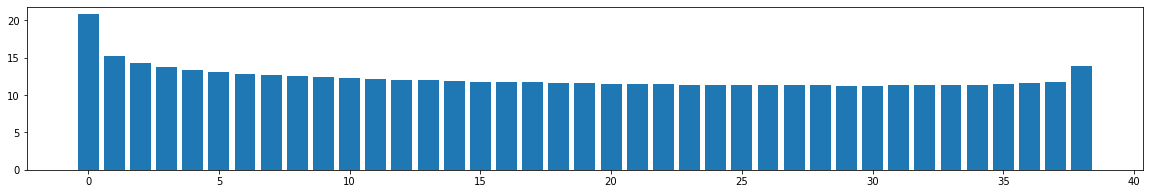

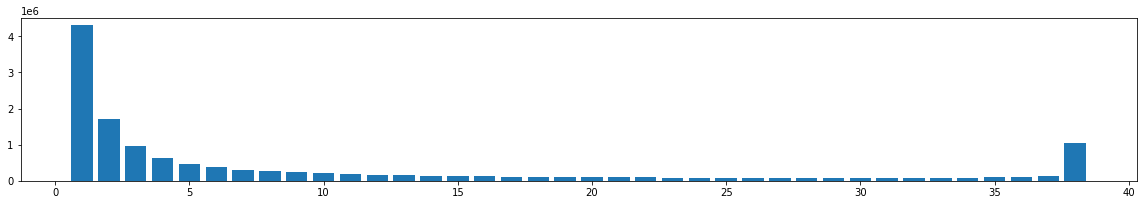

In [4]:
sfs = []
with open("/users/cristofa/scratch/Penguins/Macaroni/angsd/pop/eudyptes.autosomal.atlantic.sfs") as ifile:
    line = next(ifile)    
    row = line.strip("\n").strip().split(" ")
    for x in row:
        sfs.append(float(x))

plt.rcParams['figure.figsize'] = [20, 3]
plt.bar([x for x in range(len(sfs))], np.log(sfs))
plt.show()

plt.bar([x+1 for x in range(len(sfs)-1)], sfs[1:])
plt.show()

In [5]:
# Total number of sites (for Stairway plot input)
round(sum(sfs))

1081139974

In [136]:
def plotStairway(poplist, sites="allSites", level="b", scale="natural", ymax=None, xmax=75000, lgm=True, genadjust=[11,10]):
    
    #type is "allSites" or "noSingletons"
    #level is "w" for wide (95%), "n" for narrow (75%) and "b" for both
    #scale is natural or log
    #genadjust: preset and desired generation length

    if type(poplist) is str:
        poplist = [poplist]
        a = .25
    else:
        a = .15
        
    plt.rcParams['figure.figsize'] = [20, 6]
    k = genadjust[1]/genadjust[0]
    
    for pop in poplist:
        sty = pd.read_csv("/users/cristofa/scratch/Penguins/Macaroni/stairway/pop/" + pop + "/" + sites + "/run0/" + pop + ".final.summary", delimiter="\t")

        plt.plot(sty["year"]*k, sty["Ne_median"], c=colors[pop])

        if level in ("w", "b"):
            plt.fill_between(sty["year"]*k, sty["Ne_2.5%"], sty["Ne_97.5%"], color=colors[pop], alpha=a)
        if level in ("n", "b"):
            plt.fill_between(sty["year"]*k, sty["Ne_12.5%"], sty["Ne_87.5%"], color=colors[pop], alpha=a)
    
    if scale == "log":
        plt.yscale("log")
    
    if xmax:
        plt.xlim([0, xmax])
    if ymax:
        plt.ylim([0, ymax])
    
    if lgm:
        plt.axvspan(19000, 21000, color="#000000", lw=0, alpha=.2)
    
    if len(poplist) == 1:
        title = poplist[0].capitalize() + " population, " + sites
    else:
        title = ""
        for pop in poplist:
            title = title + pop.capitalize() + ", "
        title = title.strip(", ") + " poulations, " + sites
    
    plt.title(title, size=15, loc="left")
    
    plt.show()

## Macquarie island:

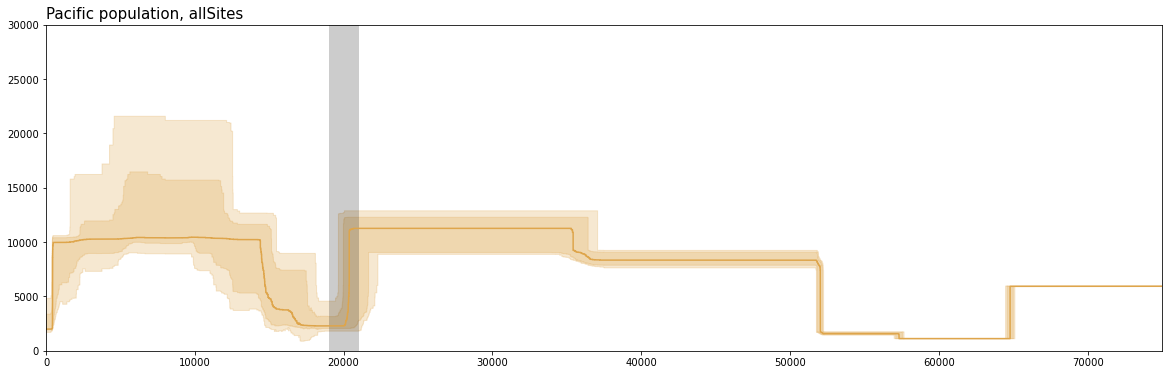

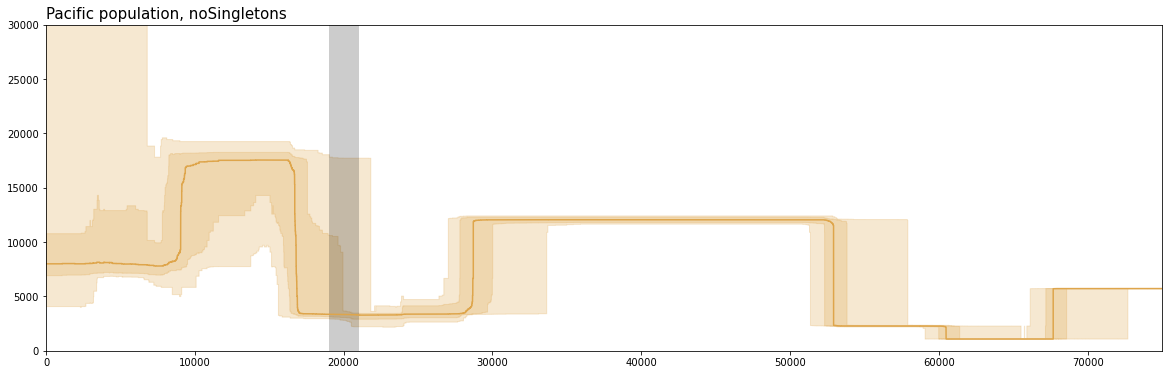

In [137]:
plotStairway("pacific", "allSites", ymax=30000)
plotStairway("pacific", "noSingletons", ymax=30000)

## South Atlantic population:

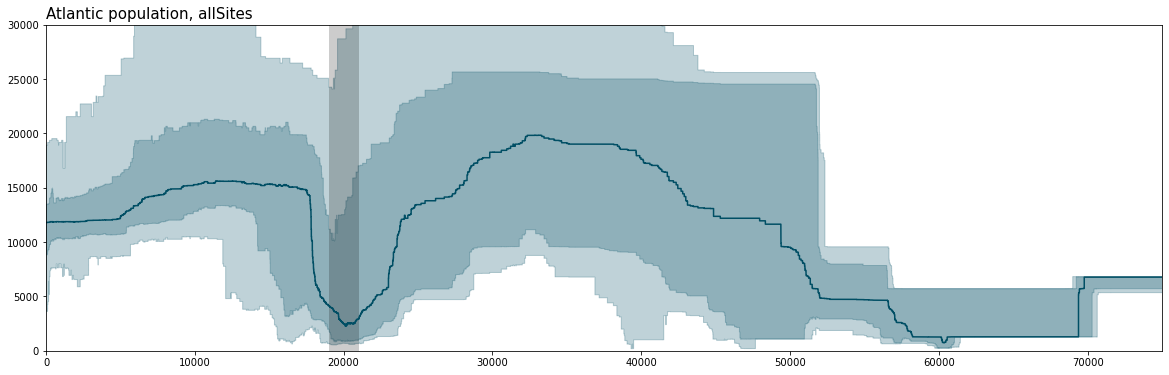

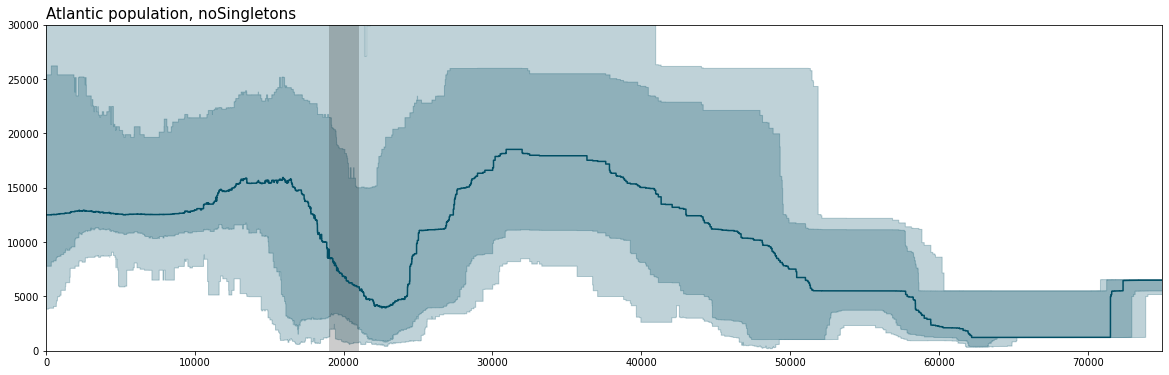

In [138]:
plotStairway("atlantic", "allSites", ymax=30000)
plotStairway("atlantic", "noSingletons", ymax=30000)

## South Indian population:

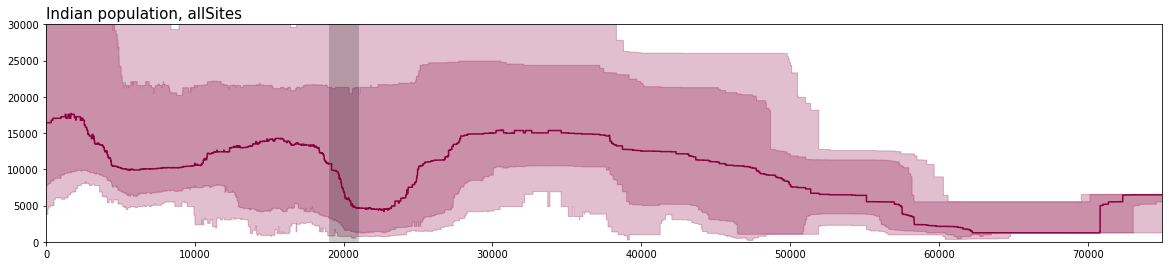

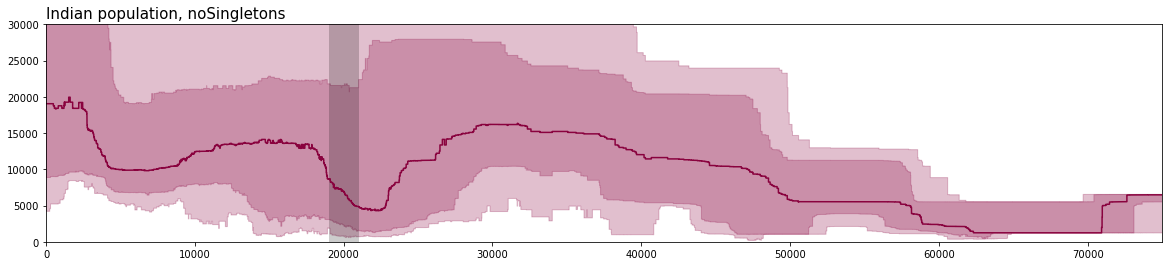

In [91]:
plotStairway("indian", "allSites", ymax=30000)
plotStairway("indian", "noSingletons", ymax=30000)

# Analysis per island:

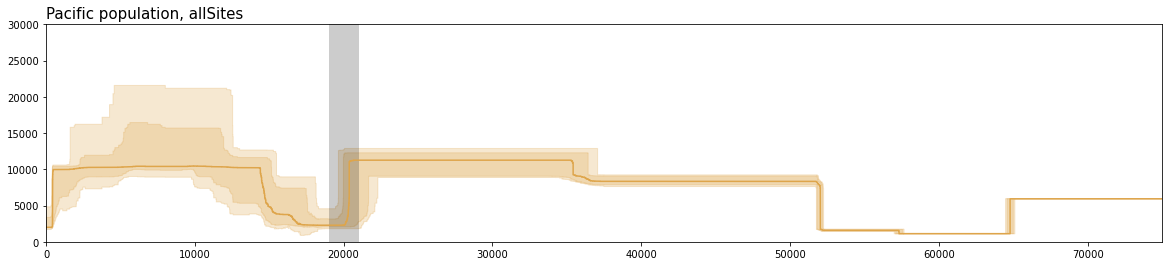

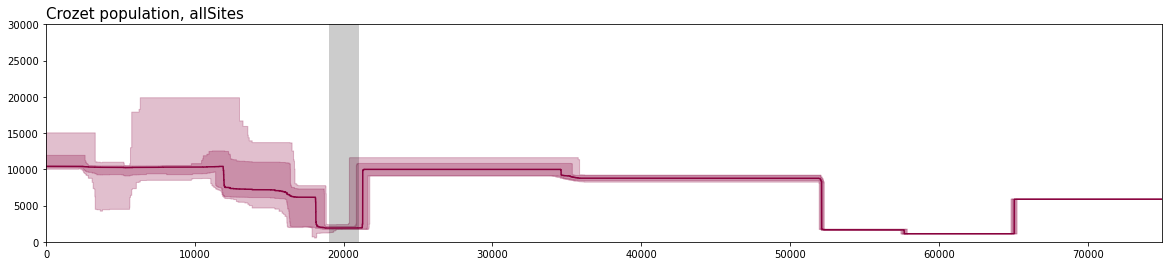

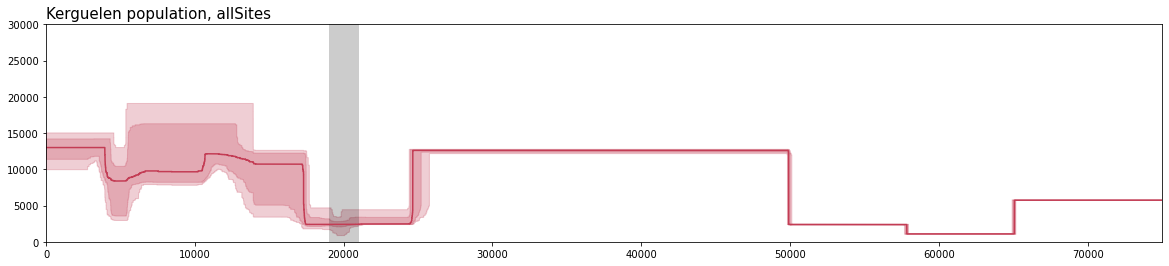

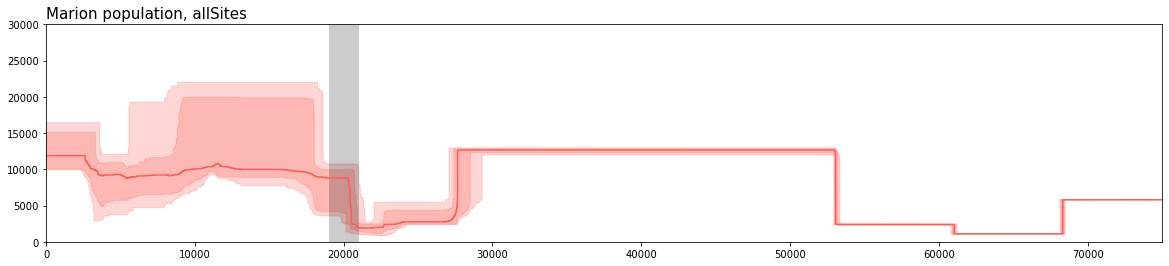

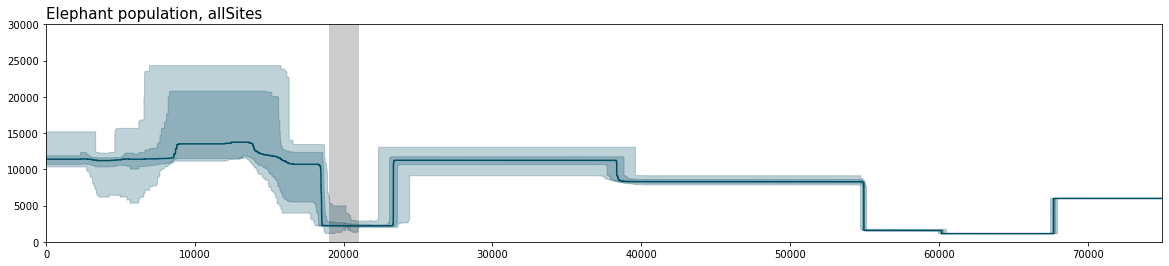

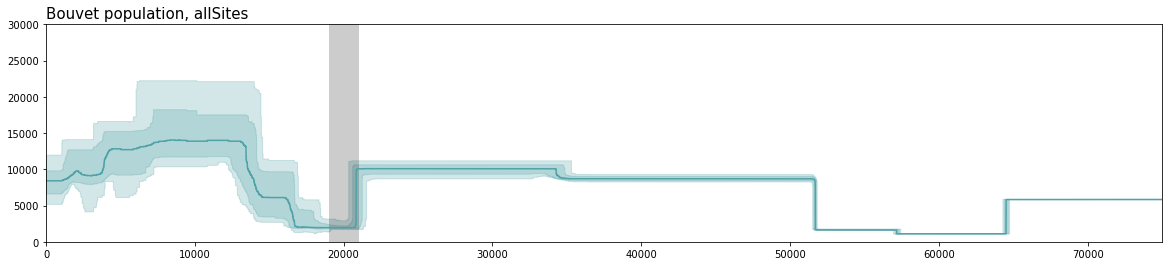

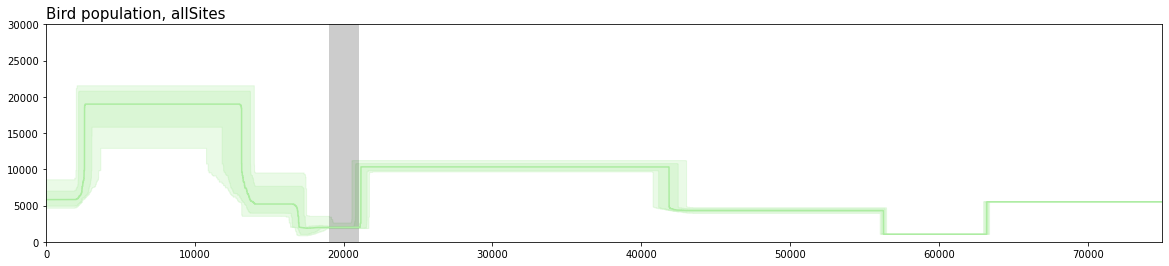

In [92]:
plotStairway("pacific", "allSites", ymax=30000)
plotStairway("crozet", "allSites", ymax=30000)
plotStairway("kerguelen", "allSites", ymax=30000)
plotStairway("marion", "allSites", ymax=30000)
plotStairway("elephant", "allSites", ymax=30000)
plotStairway("bouvet", "allSites", ymax=30000)
plotStairway("bird", "allSites", ymax=30000)

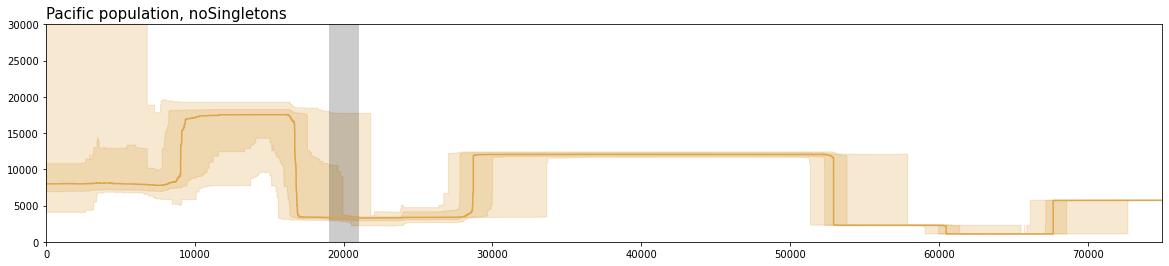

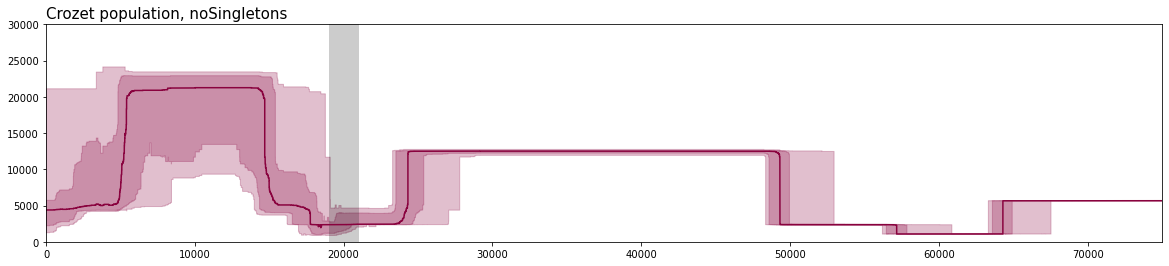

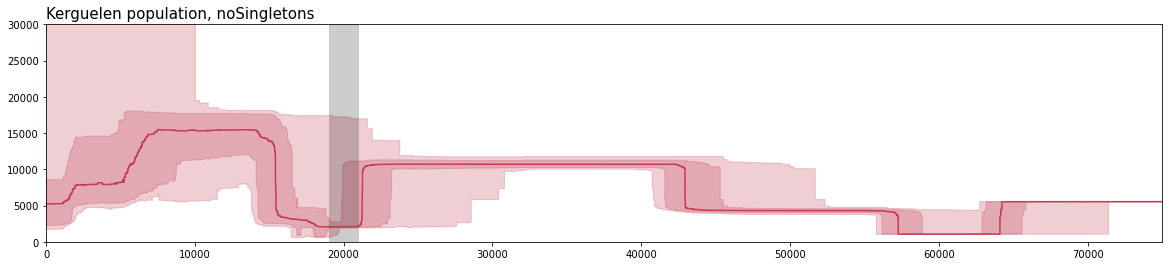

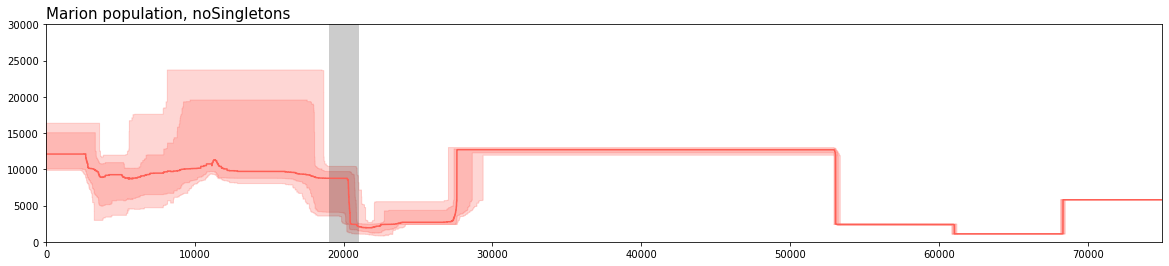

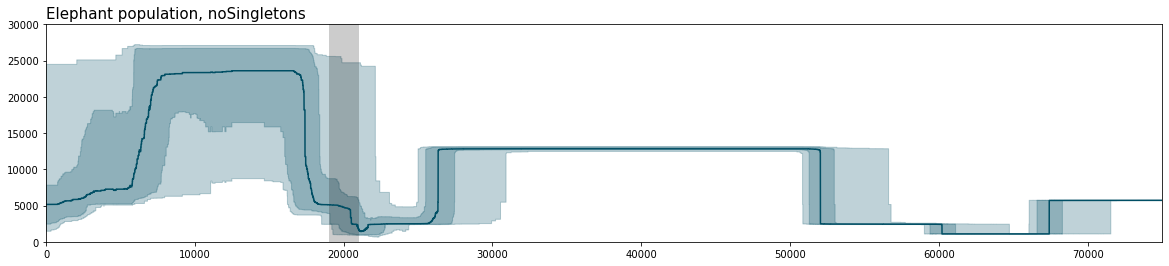

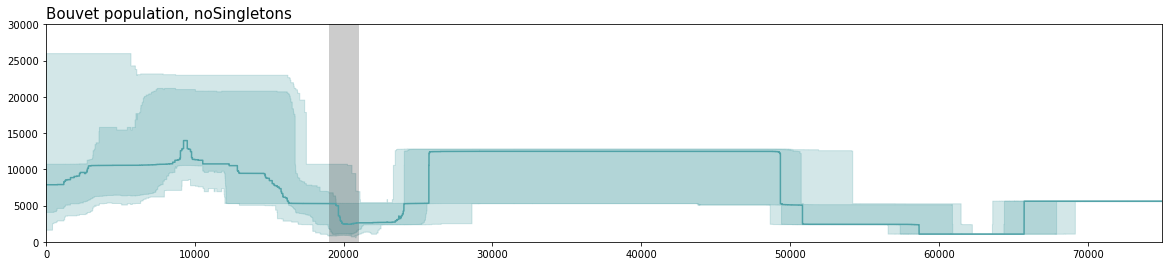

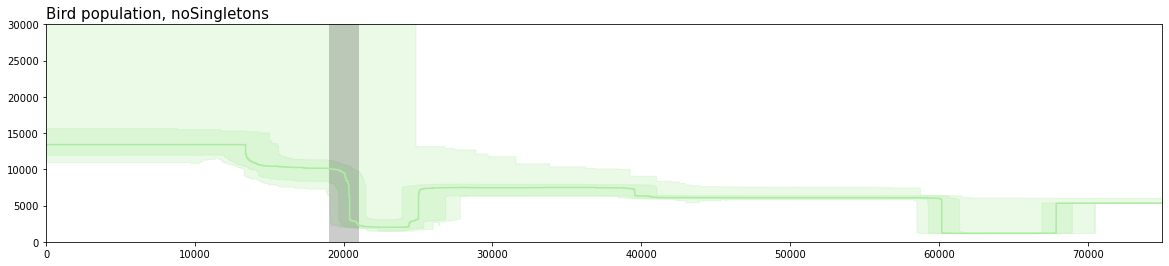

In [93]:
plotStairway("pacific", "noSingletons", ymax=30000)
plotStairway("crozet", "noSingletons", ymax=30000)
plotStairway("kerguelen", "noSingletons", ymax=30000)
plotStairway("marion", "noSingletons", ymax=30000)
plotStairway("elephant", "noSingletons", ymax=30000)
plotStairway("bouvet", "noSingletons", ymax=30000)
plotStairway("bird", "noSingletons", ymax=30000)

## Plot multiple reconstructions:

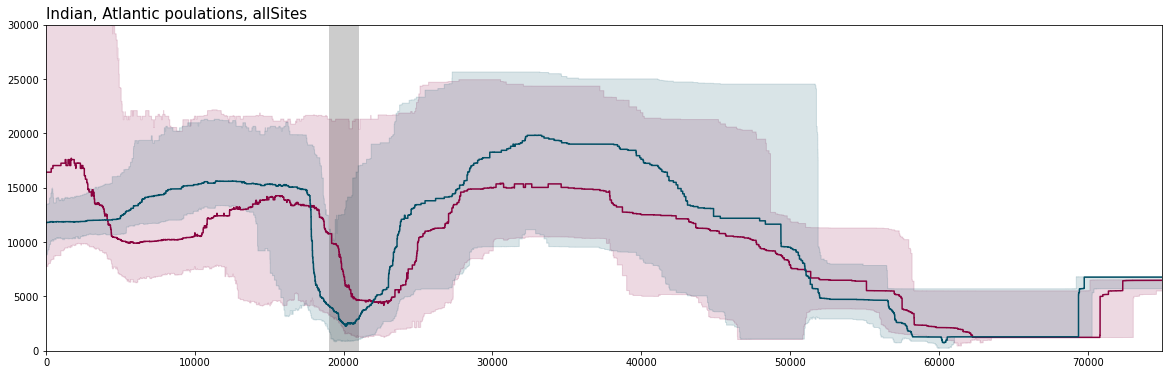

In [139]:
plotStairway(["indian", "atlantic"], ymax=30000, level="n")

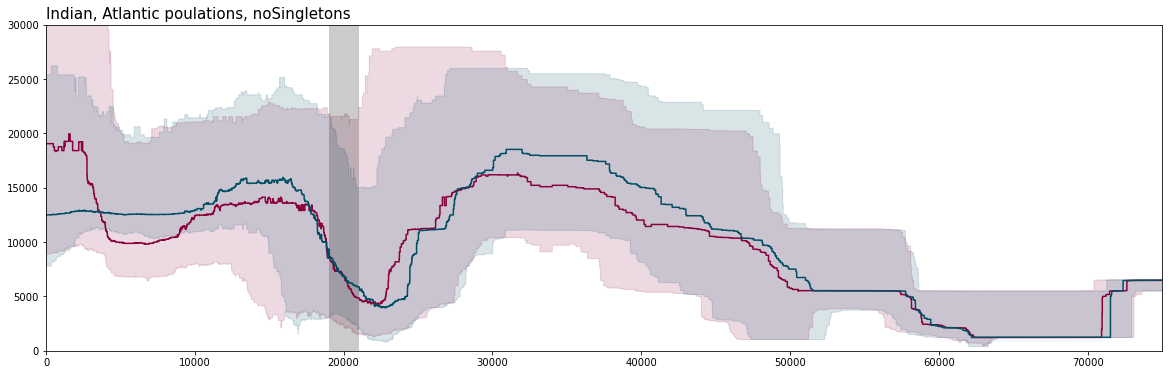

In [140]:
plotStairway(["indian", "atlantic"], ymax=30000, level="n", sites="noSingletons")

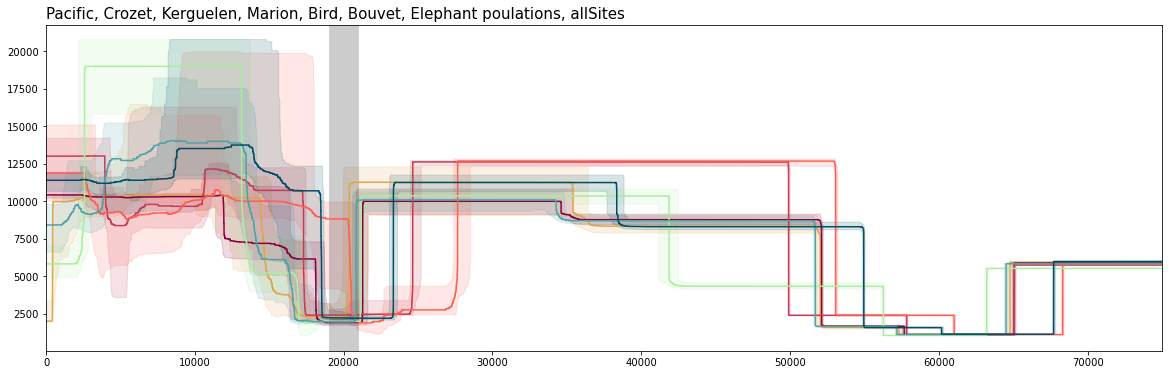

In [142]:
plotStairway(["pacific", "crozet", "kerguelen", "marion", "bird", "bouvet", "elephant"], level="n")